   # ASSIGNMENT ANSWER (Genetic Algorithm Linear Regression)
    #NAME        : EDWARD
    #NIM         : 2201741971
    #CLASS       : LTY-01
    #LECTURER    : Dr. Ir. Diaz D. Santika, M.Sc.
    #COURSE CODE : COMP8038041
    #COURSE NAME : Selected Topics in Computational Intelligence I
    #UNIVERSITY  : BINA NUSANTARA

### Import Library Needed

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

### Read CSV Data

In [2]:
df = pd.read_csv('Ecommerce Customers')

In [3]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


### Choose 2 Column

In [4]:
curr = 'Length of Membership'
curr2 = 'Yearly Amount Spent'

### Plotting

Text(0, 0.5, 'Yearly Amount Spent')

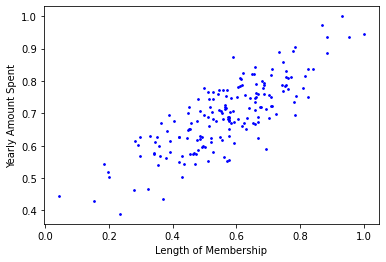

In [5]:
days = 180
X = preprocessing.normalize(df[curr].values.reshape(-1, 1)[-days:], axis=0, norm='max')
y = preprocessing.normalize(df[curr2].values.reshape(-1, 1)[-days:], axis=0, norm='max')
plt.scatter(X, y, marker='o', color='blue', s=3)
plt.xlabel(curr)
plt.ylabel(curr2)

In [6]:
# Create Linear Regression model and fit the data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
print('Coefficient :', np.round(model.coef_[0][0],decimals=4),
      '\nIntercept :', np.round(model.intercept_[0], decimals=4))

Coefficient : 0.5462 
Intercept : 0.3845


Text(0, 0.5, 'Yearly Amount Spent')

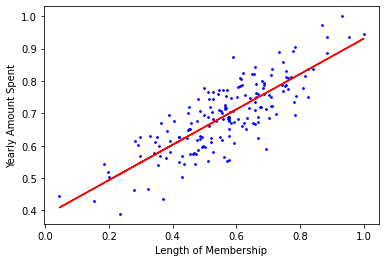

In [7]:
# Predict the data with the found best fit line and plot it
line = model.predict(X)
plt.scatter(X, y, marker='o', color='blue', s=3)
plt.plot(X, line, color='red')
plt.xlabel(curr)
plt.ylabel(curr2)

### GA functions

In [8]:
def fitness(solution):
    '''Fitness function is the Ordinary Least Squares'''
    return 1/len(X)*np.sum(np.power(y-np.concatenate((X,np.ones((X.shape[0],1))),axis=1).dot(solution.reshape(-1,1)),2))

In [9]:
def genPopulation(size=400):
    '''Generate population of size individuals'''
    # Coefficient and intercept in the range [-1, 1] since all data has been normalized with maximum value
    solutions = ((np.random.rand(size, 2) * 2) - 1)
    return solutions

In [10]:
def selectBest(solutions):
    '''Return the best 20 solution for current population'''
    fitnesses = np.apply_along_axis(fitness, 1, solutions)
    return solutions[np.argsort(fitnesses, axis=0)[:20],:]

In [11]:
def crossover(sol1, sol2):
    '''Perform crossover between two solutions by exchanging the intercepts and maintaining the coefficient'''
    offsprings = np.array([[sol1[0], sol2[1]]])
    offsprings = np.vstack((offsprings, [[sol2[0], sol1[1]]]))
    offsprings = np.vstack((offsprings, [sol2]))
    return offsprings

In [12]:
def mutation(sol):
    '''Perform mutation on the solution'''
    mutationProb = 0.15
    if np.random.rand() < mutationProb:
        sol = sol + (((np.random.rand(2) * 2) - 1) * 0.1)
    return sol

### Perform epochs while executing the genetic algorithm and Print the Best

In [13]:
%matplotlib nbagg

size = 400
solutions = genPopulation(size)
epochs = 300
best = []
inter_sol = []

for i in range(epochs):
    bestSols = selectBest(solutions)
    if i != 0 and fitness(bestSols[0]) < fitness(best):
        best = bestSols[0]
    else:
        best = bestSols[0]
    predict = np.concatenate((X, np.ones((X.shape[0],1))), axis=1).dot(best.transpose())
    inter_sol.append(predict)
    # Elitism
    newPopulation = np.array(best)
    for j in range(len(bestSols)-1):
        newPopulation = np.vstack((newPopulation, crossover(bestSols[j], bestSols[j+1])))
    newPopulation = np.apply_along_axis(mutation, 1, newPopulation)
    solutions = newPopulation
print(best)

[0.53705133 0.38919249]


### Use the best candidate solution to predict the data and plot the GA found line

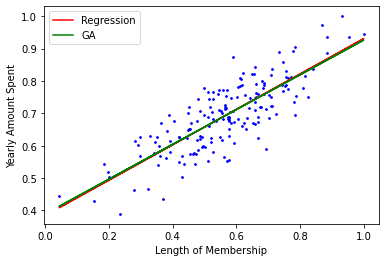

In [14]:
%matplotlib inline

predict = np.concatenate((X, np.ones((X.shape[0],1))), axis=1).dot(best.transpose())
plt.scatter(X, y, marker='o', color='blue', s=3)
plt.plot(X, line, color='red', label='Regression')
plt.plot(X, predict, color='green', label='GA')
plt.xlabel(curr)
plt.ylabel(curr2)
plt.legend(loc='best')

### Use FuncAnimation and PillowWriter to generate a gif file of the approximation procedure

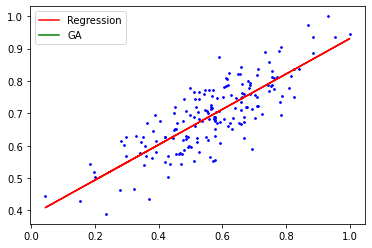

In [15]:
from matplotlib import animation, rc
import networkx as nx
from matplotlib.animation import FuncAnimation, PillowWriter 

fig, ax = plt.subplots()
rc('animation', html='html5')

ax.scatter(X, y, marker='o', color='blue', s=3)
ax.plot(X, line, color='red', label='Regression')
ga_line, = ax.plot([], [], color='green', label='GA')
ax.legend(loc='best')

In [16]:
def solver(i):
    ga_line.set_data(X, inter_sol[i])
    ax.set_xlabel('epoch {0}'.format(i))
    return ga_line, ax

In [17]:
anim = animation.FuncAnimation(fig, solver, frames=np.arange(0, 300), interval=80, repeat=False)

In [18]:
anim.save('GA_Regression_Animation_Per_Epochs.gif', dpi=80, writer='pillow')

### This is a simple example of the application of genetic algorithms in the approximation of the best fitting line to a set of datapoints.

#### While the best fitting line can be solved with much faster methods like Ordinary Least Squares, this shows the wide application of genetic algorithms in optimization problems.

#### This approach can be also considered as a substitute for Gradient Descent especially when the gradient of the loss function is not entirely defined over the parameter space.